# 비지도 학습
* deep k means
<br>: auto encoder와 k means 알고리즘을 이용한 것

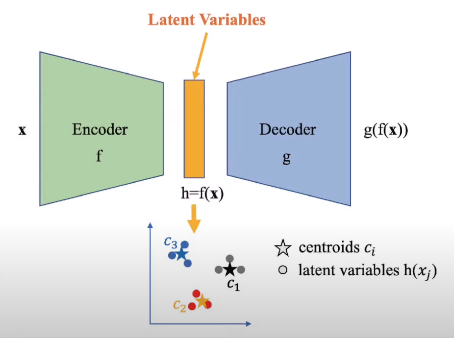

인코더를 통해 잠재변수 latent variables를 생성하고 이를 통해 디코더를 지나 새로운 이미지를 만든다.
이 latent variables는 중요한 정보를 갖고 있을 것이기에 이를 이용해서 비지도 학습을 진행해보자

> 이 장점은 1) 차원축소가 가능하다는 것과 2) 비지도 학습을 사용할 수 있다는 것이다.
<br> : 만들어진 latent vectors를 k mean algorithm(클러스터링)에 넣기만 하면 되기에 쉽기도 하다.

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import numpy as np
# 클러스터링과 분류의 큰 차이는 classification은 label이 있기에 1(코끼리)은 1(코끼리)이라는 label
# 하지만 클러스터링은 군집화 : 1조 2조 3조 or 2 3 1 조 와 같이 숫자의 큰 의미는 없다.
from scipy.optimize import linear_sum_assignment as linear_assignment # acc를 구하기 위해 이를 이용해 재배열
from sklearn.manifold import TSNE # 2차원이나 3차원으로 줄여서 시각화 할 수 있게
from matplotlib import pyplot as plt

In [ ]:
# CPU / GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(f'{device} is available')

cuda:0 is available


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
# change directory
# 왜 안 되는 것인가..
# cd/content/MyDrive/파이토치/딥러닝호형

import os

# 현재 디렉토리 확인
current_directory = os.getcwd()
print("현재 디렉토리:", current_directory)

# 디렉토리 변경
new_directory = "/content/gDrive/MyDrive/파이토치/딥러닝호형"
os.chdir(new_directory)

# 변경된 디렉토리 확인
current_directory = os.getcwd()
print("변경된 디렉토리:", current_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-16aa44dd1ab6>", line 8, in <cell line: 8>
    current_directory = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist

### 데이터 불러오기

In [ ]:
batch_size = 128
num_clusters = 10
latent_size = 10

In [ ]:
trainset = trochvision.datasets.MNIST('./data/', download=True, train=True, transform=transfoms.ToTensor())
trainloader = torch.utilas.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = trochvision.datasets.MNIST('./data/', download=True, train=False, transform=transfoms.ToTensor())
testloader = torch.utilas.data.DataLoader(testset, batch_size=batch_size, shuffle=True)